# Introduction

In this notebook you will learn how to make a simple 3D visualization of the motion of the human using [pydy-viz](https://github.com/pydy/pydy-viz).

# Setup

Display the problem diagram for reference:

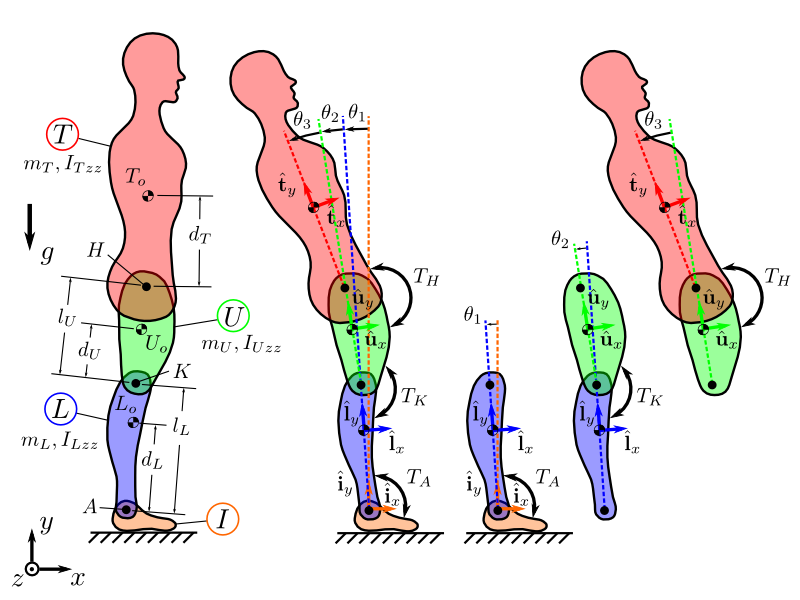

In [1]:
from __future__ import print_function, division
from IPython.display import Image
Image('figures/human_balance_diagram.png')

In [2]:
from solution.simulation import *

We import the shapes we are going to use in our visualization.

In [3]:
from pydy.viz.shapes import Cylinder, Sphere
import pydy.viz
pydy.viz.shapes.__all__

['Cube',
 'Cylinder',
 'Cone',
 'Sphere',
 'Circle',
 'Plane',
 'Tetrahedron',
 'Octahedron',
 'Icosahedron',
 'Torus',
 'TorusKnot',
 'Tube']

Import other methods from the package!

In [4]:
from pydy.viz.visualization_frame import VisualizationFrame
from pydy.viz.scene import Scene

# Visualization

First we need to create shapes to associate with rigid body. We will start by creating a sphere to represent each joint.

In [5]:
Sphere?

In [6]:
ankle_shape = Sphere(color='black', radius=0.1)
knee_shape = Sphere(color='black', radius=0.1)
hip_shape = Sphere(color='black', radius=0.1)
head_shape = Sphere(color='black', radius=0.125)

Now create a visualization frame for each of the shapes. A `VisualizationFrame` object essentially attaches a shape to a reference frame and a point. Since it doesn't matter if the spheres rotate, we can simply attach them to the inertial reference frame.

In [ ]:
VisualizationFrame?

In [7]:
ankle_viz_frame = VisualizationFrame(inertial_frame, ankle, ankle_shape)
knee_viz_frame = VisualizationFrame(inertial_frame, knee, knee_shape)
hip_viz_frame = VisualizationFrame(inertial_frame, hip, hip_shape)

Here create a point for a "Head" and teh `VisualizationFrame`.

In [8]:
head = Point('N')  # N for Noggin
head.set_pos(hip, 2 * torso_com_length * torso_frame.y)
head_viz_frame = VisualizationFrame(inertial_frame, head, head_shape)

We will also need some points for the geometric center of the lower leg, upper leg, and torso. If we attache a `Cylinder` shape to those bodies, the `Cylinder` is defined with it's long axis along the Y direction of the attached reference frame and the geometric center is the local origin.

In [9]:
lower_leg_center = Point('l_c')
upper_leg_center = Point('u_c')
torso_center = Point('t_c')

In [10]:
lower_leg_center.set_pos(ankle, lower_leg_length / 2 * lower_leg_frame.y)
upper_leg_center.set_pos(knee, upper_leg_length / 2 * upper_leg_frame.y)
torso_center.set_pos(hip, torso_com_length * torso_frame.y)

It will be helpful to have easy access to the constants to specify the cylinder lengths.

In [11]:
constants_dict = dict(zip(constants, numerical_constants))
constants_dict

{l_L: 0.611,
 d_L: 0.387,
 m_L: 6.769,
 I_Lz: 0.101,
 l_U: 0.424,
 d_U: 0.193,
 m_U: 17.01,
 I_Uz: 0.282,
 d_T: 0.305,
 m_T: 32.44,
 I_Tz: 1.485,
 g: 9.81}

Now create some cylinders to attach to the three rigid bodies.

In [ ]:
Cylinder?

In [12]:
lower_leg_shape = Cylinder(radius=0.08, length=constants_dict[lower_leg_length], color='blue')

lower_leg_viz_frame = VisualizationFrame('Lower Leg', lower_leg_frame, lower_leg_center, lower_leg_shape)

In [13]:
upper_leg_shape = Cylinder(radius=0.08, length=constants_dict[upper_leg_length], color='green')

upper_leg_viz_frame = VisualizationFrame('Upper Leg', upper_leg_frame, upper_leg_center, upper_leg_shape)

In [14]:
torso_shape = Cylinder(radius=0.08, length=2 * constants_dict[torso_com_length], color='red')

torso_viz_frame = VisualizationFrame('Torso', torso_frame, torso_center, torso_shape)

Now we create a scene whose base frame is the system's inertial frame and whose origin is the ankle point.

In [ ]:
Scene?

In [15]:
scene = Scene(inertial_frame, ankle)

Now we append the frames we wish to visualize in the scene object, as a list.

In [16]:
scene.visualization_frames = [ankle_viz_frame,
                              knee_viz_frame,
                              hip_viz_frame,
                              head_viz_frame,
                              lower_leg_viz_frame,
                              upper_leg_viz_frame,
                              torso_viz_frame]

We provide the scene with the list of symbolic states, the list of constants, as well as the numerical values of each.

In [17]:
scene.states_symbols = coordinates + speeds
scene.constants = constants_dict
scene.states_trajectories = y

Finally, we can display the visualization of the free motion of the system in the cell with the following method:

## Exercise

Edit the notebook above and try to add a nose to the "head" sphere in the visualization so you can tell which direction the person is facing. The nose should point in the $x$ direction. Maybe try the `Cone` shape in `pydy_viz.shapes`. You may have to create new reference frames or points to get the the shape oriented and positioned correctly.

## Exercise

Can you make the visualization look more human like? Maybe cylinders for each leg? Cylinders for arms? See what shapes are available in `pydy_viz.shapes`. You may have to create new reference frames or points to get the the shapes oriented and positioned correctly. Edit the notebook above to see if you can improve the visualization.

In [18]:
scene.display_ipython()

HTML(value='<!DOCTYPE html>\n<html lang="en">\n\n  <head>\n\n    <meta http-equiv="Content-Type" content="text…